In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df=pd.read_csv('appliancesload.csv')
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0


In [3]:
#Seperating the Time column that's attached to dateframe from the source
df[["Date", "time"]] = df["Time"].str.split(" ", expand = True)
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [4]:
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [5]:
#Removing the Time column from the table (no longer necessary)
dm = df.drop(["Time"], axis=1)
dm

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [6]:
#Process date feature into day and month
#Process time feature into hour and minute
dm[["Hour", "Minute"]] = dm["time"].str.split(":", expand = True)
dm[["Day", "Month", "Year"]] = dm["Date"].str.split("/", expand = True)
dm = dm.drop(["time", "Date"], axis=1) #drop off the time and Date column 
dm

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Hour,Minute,Day,Month,Year
0,695,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
1,694,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
2,694,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
3,702,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
4,700,88,0,0,0,0,0,0,0,0,22,08,17,09,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,115,1,0,0,0,0,0,0,0,0,00,35,10,04,2014
1008349,115,1,0,0,0,0,0,0,0,0,00,35,10,04,2014
1008350,116,1,0,0,0,0,0,0,0,0,00,35,10,04,2014
1008351,116,1,0,0,0,0,0,0,0,0,00,35,10,04,2014


In [7]:
#Rearrange columns 
dm =dm.reindex(columns = ["Day", "Month","Year","Hour","Minute","Aggregate",	"Fridge-Freezer",	"Washing Machine",	"Dishwasher",	"Television Site",	"Microwave",	"Toaster",	"Hi-Fi",	"Kettle",	"Overhead Fan"])
dm

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10,04,2014,00,35,115,1,0,0,0,0,0,0,0,0
1008349,10,04,2014,00,35,115,1,0,0,0,0,0,0,0,0
1008350,10,04,2014,00,35,116,1,0,0,0,0,0,0,0,0
1008351,10,04,2014,00,35,116,1,0,0,0,0,0,0,0,0


In [8]:
dt=dm[~(dm['Year']=='2014')]
print("DataFrame for the Project")
dt

DataFrame for the Project


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0


In [9]:
#Check head of modified dataset to ensure only 1 year is showing
dt.head() 

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0


In [10]:
#Check tail of modified dataset to ensure only 1 year is showing
dt.tail() 

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0
487250,26,12,2013,16,08,280,1,18,0,0,0,0,0,0,0


In [11]:
#Check for missing data
dt.isnull().sum()

Day                0
Month              0
Year               0
Hour               0
Minute             0
Aggregate          0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
dtype: int64

In [12]:
#Extract consumption of individual appliances in graphs on monthly basis by first studying how many months of the year were captured in the dataset 
dt.Month.unique()

array(['09', '10', '12'], dtype=object)

In [13]:
#only three different months were captured, and in object type
#we first convert to integers
#Convert month type to integers
dt['Month']=dt['Month'].astype('int')

#and then assign each integer to corresponding month name (month)
def month(Month):
    if Month in [9]:
        month = 'September'
    elif Month in [10]:
        month = 'October'
    else:
        month = 'December'
    return month
#replace the Month column with month names (month)
dt['month']=dt['Month'].apply(month)
dt

C:\Users\User\AppData\Local\Temp\ipykernel_11252\4273171949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Month']=dt['Month'].astype('int')
C:\Users\User\AppData\Local\Temp\ipykernel_11252\4273171949.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['month']=dt['Month'].apply(month)


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December


In [14]:
dt['Month']=dt['Month'].astype('int')

C:\Users\User\AppData\Local\Temp\ipykernel_11252\2627457367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Month']=dt['Month'].astype('int')


In [15]:
#Assign each integer to corresponding month name (month)
def month(Month):
    if Month in [9]:
        month = 'September'
    elif Month in [10]:
        month = 'October'
    else:
        month = 'December'
    return month
dt['month']=dt['Month'].apply(month)
dt

C:\Users\User\AppData\Local\Temp\ipykernel_11252\840802576.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['month']=dt['Month'].apply(month)


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December


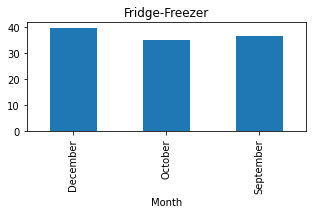

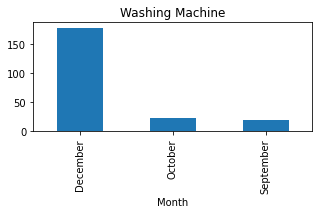

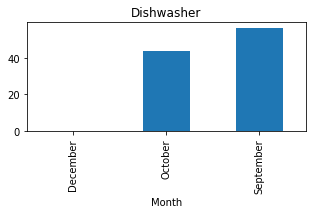

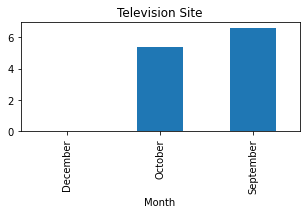

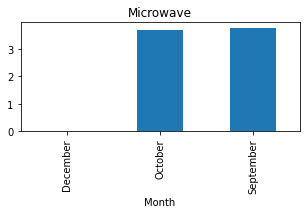

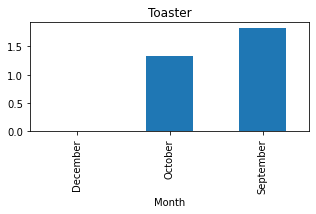

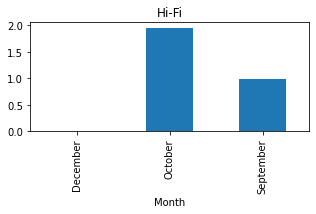

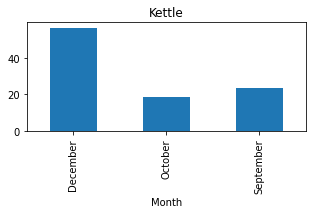

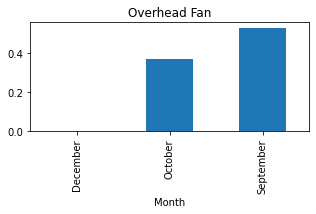

In [18]:
#Extract consumption of individual appliances in graphs on monthly basis
dt.groupby('month')['Fridge-Freezer'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Fridge-Freezer')
plt.show()
dt.groupby('month')['Washing Machine'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Washing Machine')
plt.show()
dt.groupby('month')['Dishwasher'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Dishwasher')
plt.show()
dt.groupby('month')['Television Site'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Television Site')
plt.show()
dt.groupby('month')['Microwave'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Microwave')
plt.show()
dt.groupby('month')['Toaster'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Toaster')
plt.show()
dt.groupby('month')['Hi-Fi'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Hi-Fi')
plt.show()
dt.groupby('month')['Kettle'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Kettle')
plt.show()
dt.groupby('month')['Overhead Fan'].mean().plot.bar(figsize=(5,2))
plt.xlabel('Month')
plt.title('Overhead Fan')
plt.show()

In [17]:
#Identify unique values in hours
dt['Hour'].nunique()

24

In [18]:
dt['Hour']=dt['Hour'].astype('int')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\1788997886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Hour']=dt['Hour'].astype('int')


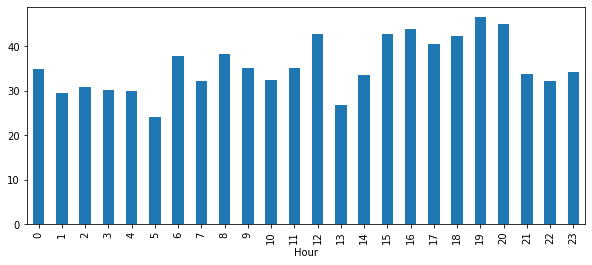

In [19]:
#Comparing hour usage of appliance using barplot
dt.groupby('Hour')['Fridge-Freezer'].mean().plot.bar(figsize=(10,4))
plt.title =('Fridge-Freezer')
plt.show()

In [20]:
dt['Hour']=dt['Hour'].astype('object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\3764634878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Hour']=dt['Hour'].astype('object')


In [21]:
dh = dt.set_index('Hour')
dh

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,Day,Month,Year,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
Hour,,,,,,,,,,,,,,,
22,17,9,2013,08,695,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,694,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,694,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,702,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,26,12,2013,07,355,1,5,0,0,0,0,0,0,0,December
16,26,12,2013,08,358,1,5,0,0,0,0,0,0,0,December
16,26,12,2013,08,322,1,25,0,0,0,0,0,0,0,December


In [22]:
#Comparing hour usage of appliances using stackplot
by_hours_df = dh.iloc[:, 2:].groupby(dh.index).mean()

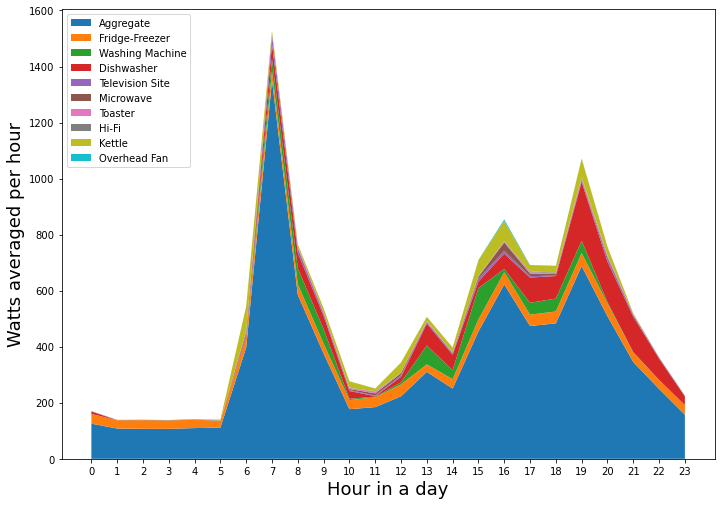

In [23]:
#Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
#Stackplot
ax.stackplot(list(range(24)), np.transpose(by_hours_df.values), labels=by_hours_df.columns.values)
plt.xlabel('Hour in a day', fontsize=18)
plt.ylabel('Watts averaged per hour', fontsize=18)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend(loc=2)

In [24]:
dh

,Day,Month,Year,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
Hour,,,,,,,,,,,,,,,
22,17,9,2013,08,695,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,694,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,694,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,702,88,0,0,0,0,0,0,0,0,September
22,17,9,2013,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,26,12,2013,07,355,1,5,0,0,0,0,0,0,0,December
16,26,12,2013,08,358,1,5,0,0,0,0,0,0,0,December
16,26,12,2013,08,322,1,25,0,0,0,0,0,0,0,December


In [25]:
#Compare all the appliance usuage
#drop features that are not relevant to the comparison

data= dt.drop(["Month","Aggregate","Year","Day","Hour","Minute"], axis=1)
data_2=data.describe()
data_2

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000


In [26]:
dt

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December


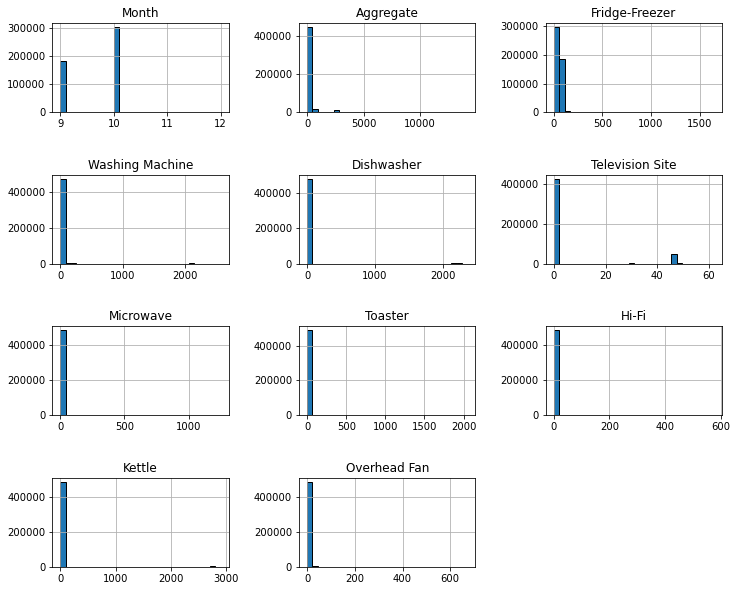

In [27]:
#Check the distribution of all variables
dt.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [28]:
features_of_interest = ["Fridge-Freezer", "Dishwasher"]
dt[features_of_interest].describe()

,Fridge-Freezer,Dishwasher
count,487251.000000,487251.000000
mean,35.509772,48.534603
std,45.337155,311.842492
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,84.000000,0.000000
max,1647.000000,2358.000000


<AxesSubplot:ylabel='Fridge-Freezer'>

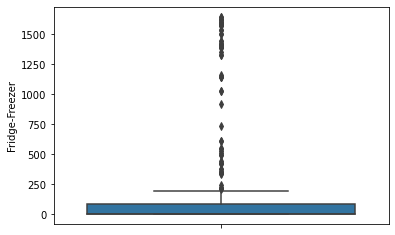

In [34]:
#Boxplot to examine outlier
import seaborn as sns
sns.boxplot(y=dt['Fridge-Freezer'])

<AxesSubplot:ylabel='Dishwasher'>

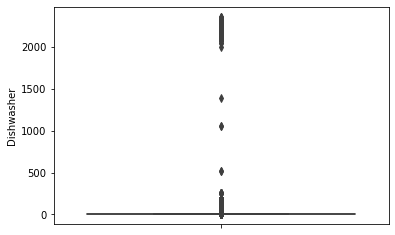

In [37]:

sns.boxplot(y=dt['Dishwasher'])

In [38]:
#Identify outliers by finding the distribution boundaries according to the IQR proximity rule.
def find_boundaries(dt, variable, distance):

    IQR = dt[variable].quantile(0.75) - dt[variable].quantile(0.25)

    lower_boundary = dt[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = dt[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [39]:
#Fistly, let's use the function to determine the limits of the Fridge-Freezer variable:
Fridge_upper_boundary, Fridge_lower_boundary = find_boundaries(dt, 'Fridge-Freezer', 1.5)
Fridge_upper_boundary, Fridge_lower_boundary

(208.5, -123.5)

In [40]:
#Identify outliers in Fridge-Freezer by creating a Boolean vector:
outliers_Fridge = np.where(dt['Fridge-Freezer'] > Fridge_upper_boundary, True, 
                    np.where(dt['Fridge-Freezer'] < Fridge_lower_boundary, True, 
                    False))
outliers_Fridge

array([False, False, False, ..., False, False, False])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fridge-Freezer'>

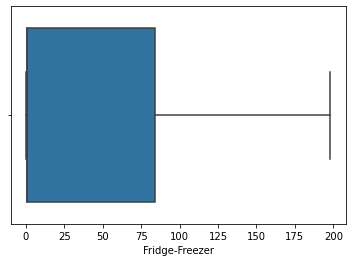

In [41]:
#Eliminate outliers from the dataset:
Fridge_trimmed = dt.loc[~(outliers_Fridge)]
sns.boxplot(Fridge_trimmed['Fridge-Freezer'])

In [42]:
#Next, we use the function to determine the limits of the Dishwasher variable:
Dishwasher_upper_boundary, Dishwasher_lower_boundary = find_boundaries(dt, 'Dishwasher', 1.5)
Dishwasher_upper_boundary, Dishwasher_lower_boundary

(0.0, 0.0)

In [43]:
#Create a Boolean vector to flag the outliers in Dishwasher:
outliers_Dishwasher = np.where(dt['Dishwasher'] > Dishwasher_upper_boundary, True, 
                    np.where(dt['Dishwasher'] < Dishwasher_lower_boundary, True, 
                    False))
outliers_Dishwasher

array([False, False, False, ..., False, False, False])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dishwasher'>

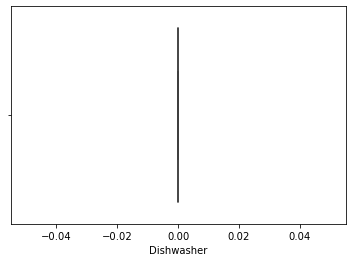

In [55]:
#Eliminate outliers from the dataset:
Dwasher_trimmed = dt.loc[~(outliers_Dishwasher)]
sns.boxplot(Dwasher_trimmed['Dishwasher'])

In [ ]:
IMPLEMENT AN ANALYSIS THAT TELLS THE CUSTOMER WNEN USAGE FALLS UNDER THE FOLLOWING CATEGORIES: LOW, MEDIUM or HIGH

In [46]:
dv = dt.loc[:,['Aggregate']]
dv

,Aggregate
0,695
1,694
2,694
3,702
4,700
...,...
487246,355
487247,358
487248,322
487249,280


In [47]:
dv.loc[dv['Aggregate']<= 1800, 'Usage'] = 'Low' #For consumption below 1800kWh
dv.loc[dv['Aggregate']> 4300, 'Usage'] = 'High' #For consumption above 4300kWh
dv.fillna('Medium', inplace = True)  #For when consumption falls between the low and high Usage
dv

,Aggregate,Usage
0,695,Low
1,694,Low
2,694,Low
3,702,Low
4,700,Low
...,...,...
487246,355,Low
487247,358,Low
487248,322,Low
487249,280,Low


In [48]:
#Code to observe the frequency of low, medium and high usage
dv.groupby('Usage').size()

Usage
High        3517
Low       461842
Medium     21892
dtype: int64

MODELLING AND MACHINE LEARNING

In [50]:
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [51]:
dx=df.loc[:,['Date', 'Aggregate', 'Fridge-Freezer']]
dx

,Date,Aggregate,Fridge-Freezer
0,17/09/2013,695,88
1,17/09/2013,694,88
2,17/09/2013,694,88
3,17/09/2013,702,88
4,17/09/2013,700,88
...,...,...,...
1008348,10/04/2014,115,1
1008349,10/04/2014,115,1
1008350,10/04/2014,116,1
1008351,10/04/2014,116,1


In [64]:
dx.columns = dx.columns.str.replace('Fridge-Freezer', 'Fridge_Freezer')
dx

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
1008348,2014-04-10,115,1
1008349,2014-04-10,115,1
1008350,2014-04-10,116,1
1008351,2014-04-10,116,1


In [65]:
dx['Date'] = pd.to_datetime(dx['Date'], format = "%d/%m/%Y")
dx

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
1008348,2014-04-10,115,1
1008349,2014-04-10,115,1
1008350,2014-04-10,116,1
1008351,2014-04-10,116,1


In [66]:
dj = dx[~dx.Date.dt.year.isin([2014,2015])]
dj

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
487246,2013-12-26,355,1
487247,2013-12-26,358,1
487248,2013-12-26,322,1
487249,2013-12-26,280,1


DATA SPLITTING

In [69]:
def create_split_features(dj, target_variable):
    """
    Creates time series features from datetime index
    Sepearte the target variable
    Use train_test_split() in order to create training and validation datasets.
    
    Returns:
        X (int): Extracted values from datetime index, dataframe
        y (int): Values of target variable, numpy array of integers
    """
    dj['date'] = dj.index
    dj['day'] = dj['Date'].dt.day
    dj['month'] = dj['Date'].dt.month
    
    
    X = dj[['day','month', 'Fridge_Freezer']]
    
    if target_variable:
        y = dj[target_variable]
    
    # split the full data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [70]:
X_train, X_valid, y_train, y_valid = create_split_features(dj,target_variable="Aggregate")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\2516405378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj['date'] = dj.index
C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\2516405378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj['day'] = dj['Date'].dt.day
C:\Users\Admin\AppData\Local\Temp\ipykernel_12588\2516405378.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [71]:
X_train

,day,month,Fridge_Freezer
294544,9,10,83
297967,9,10,82
141219,28,9,1
353645,14,10,162
386141,17,10,87
...,...,...,...
136767,27,9,167
204614,2,10,1
476497,24,10,1
214539,3,10,86


In [72]:
y_train

294544     174
297967     269
141219      60
353645    2063
386141     142
          ... 
136767     205
204614      58
476497     348
214539     292
176991      68
Name: Aggregate, Length: 389800, dtype: int64

In [73]:
# Split data again
# Note that 0.875*0.8 = 0.7 so the final effect of these two splits is to have 
#the original data split into training/validation/test sets in a 70:20:10 ratio.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101) 

In [74]:
print("TRAIN SET:", len(X_train), "VALIDATION SET:", len(X_valid), "TEST SET:", len(X_test))

TRAIN SET: 341075 VALIDATION SET: 97451 TEST SET: 48725


In [75]:
# Set up a function to encode according to the input provided using one-hot encoding
def encoding(df):
    enc = pd.get_dummies(df, drop_first=True) #this will encode the "promo" feature
    return enc

In [76]:
#Apply encoding function
X_train = encoding(X_train)

In [77]:
X_train

,day,month,Fridge_Freezer
267330,7,10,86
404411,18,10,1
58707,22,9,1
222749,3,10,166
173051,30,9,1
...,...,...,...
87809,24,9,1
303691,10,10,1
18202,19,9,1
224455,4,10,1


In [78]:
X_valid = encoding(X_valid)

In [79]:
X_test = encoding(X_test)

In [80]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [81]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [82]:
#Convert the NumPy arrays into dataframes just to use for correlation analysis:
variables = ['day','month', 'Fridge_Freezer']
X_train_scaled_dj = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled_dj = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled_dj = pd.DataFrame(X_test_scaled, columns = variables)

<AxesSubplot:>

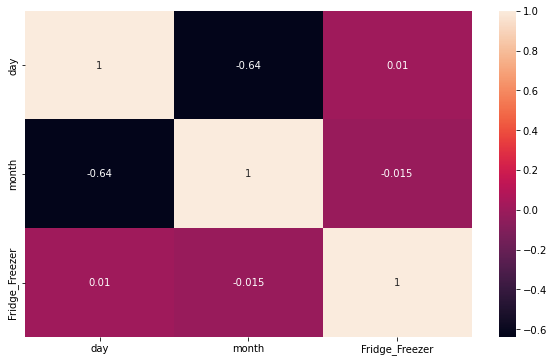

In [83]:
# Create a correlation matrix for the dataframe
corr = X_train_scaled_dj.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr, annot = True)

In [84]:
#Get a new sets of scaled features
scaler = RobustScaler()
scaler.fit(X_train_scaled_dj)

X_train_scaled = scaler.transform(X_train_scaled_dj)
X_valid_scaled = scaler.transform(X_valid_scaled_dj)
X_test_scaled = scaler.transform(X_test_scaled_dj)

In [85]:
X_train_scaled.shape

(341075, 3)

In [86]:
dj_plot = dj.copy()

In [87]:
dj_plot.columns = dj_plot.columns.str.replace(' ', '_')

In [88]:
dj_plot

,Date,Aggregate,Fridge_Freezer,date,day,month
0,2013-09-17,695,88,0,17,9
1,2013-09-17,694,88,1,17,9
2,2013-09-17,694,88,2,17,9
3,2013-09-17,702,88,3,17,9
4,2013-09-17,700,88,4,17,9
...,...,...,...,...,...,...
487246,2013-12-26,355,1,487246,26,12
487247,2013-12-26,358,1,487247,26,12
487248,2013-12-26,322,1,487248,26,12
487249,2013-12-26,280,1,487249,26,12


In [89]:
dj_plot.set_index('Date', inplace=True) #set date as index

<AxesSubplot:xlabel='Date'>

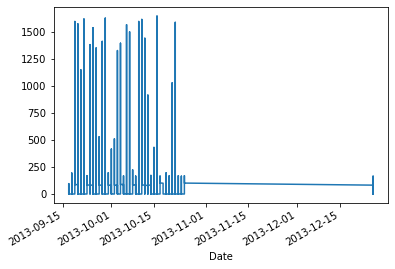

In [91]:
dj_plot.Fridge_Freezer.plot()


In [94]:
# define the model
model = LinearRegression()
#fit the model (We got error here, beacuse the target has missing values)
model.fit(X_train_scaled, y_train)

LinearRegression()

month               1.467357
day                19.117048
Fridge_Freezer    104.601268
dtype: float64


<AxesSubplot:>

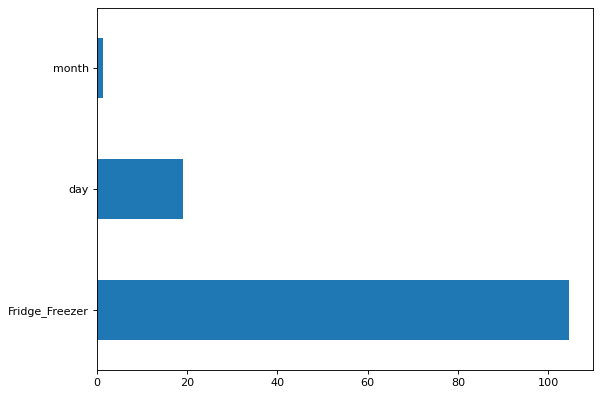

In [96]:
# define the model
model = LinearRegression()
# fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled, y_valid)
# get importance
importance = model.coef_
# summarize feature importance
predictors = X_valid_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.coef_, index= X_valid_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [97]:
#Predict the missing values in y_train and save as y_train_pred
y_train_pred = model.predict(X_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [98]:
#Put the prediction in a dataframe now called ypred (just for checks)
ypred = pd.DataFrame(y_train_pred ,columns=['New_y_train'])
ypred

,New_y_train
0,9456.248587
1,775.428350
2,850.429183
3,17747.881820
4,1003.365565
...,...
341070,888.663279
341071,622.491968
341072,793.078040
341073,507.789682


In [99]:
#No missing value in the target (y_train/ypred) again
ypred.isnull().sum()

New_y_train    0
dtype: int64

In [100]:
#Predict the missing values in y_test and save as y_test_pred
y_test_pred = model.predict(X_test_scaled)

month             0.000045
day               0.001124
Fridge_Freezer    0.998832
dtype: float64


<AxesSubplot:>

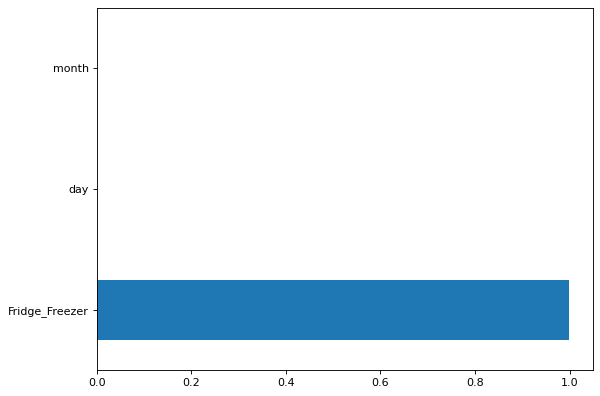

In [102]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

month             0.000014
day               0.001158
Fridge_Freezer    0.998828
dtype: float64


<AxesSubplot:>

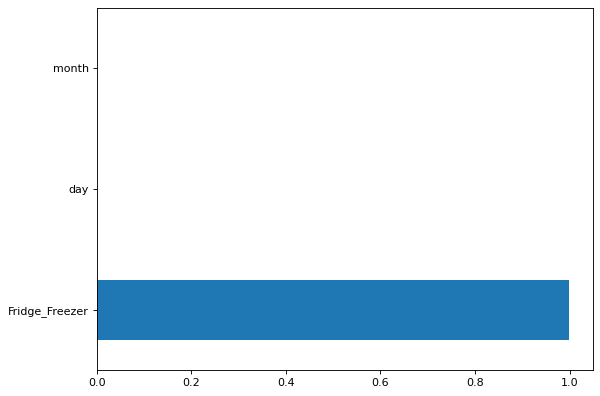

In [104]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

month             0.000049
day               0.001408
Fridge_Freezer    0.998542
dtype: float32


<AxesSubplot:>

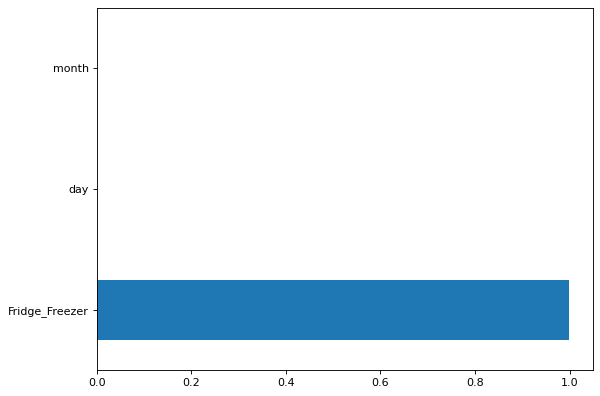

In [105]:
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [106]:
X_train_scaled_dj.drop(['month'], axis=1, inplace=True)
X_train_scaled_dj

,day,Fridge_Freezer
0,-0.923077,1.024096
1,-0.076923,0.000000
2,0.230769,0.000000
3,-1.230769,1.987952
4,0.846154,0.000000
...,...,...
341070,0.384615,0.000000
341071,-0.692308,0.000000
341072,0.000000,0.000000
341073,-1.153846,0.000000


In [107]:
X_test_scaled_dj.drop(['month'], axis=1, inplace=True)
X_test_scaled_dj

,day,Fridge_Freezer
0,0.461538,0.000000
1,-0.692308,1.036145
2,0.461538,0.000000
3,0.230769,0.000000
4,0.000000,0.000000
...,...,...
48720,0.538462,0.000000
48721,0.230769,1.036145
48722,0.076923,0.975904
48723,-1.384615,0.987952


In [108]:
X_valid_scaled_dj.drop(['month'], axis=1, inplace=True)
X_valid_scaled_dj

,day,Fridge_Freezer
0,0.076923,0.000000
1,0.846154,1.156627
2,0.307692,1.228916
3,0.384615,0.000000
4,0.153846,0.000000
...,...,...
97446,0.000000,0.000000
97447,-1.000000,0.987952
97448,0.307692,0.518072
97449,0.153846,1.012048


In [109]:
#Re-Scale the adjusted data above
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [110]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [111]:
#Shape has not reduced even after we removed "month"
X_train_scaled.shape

(341075, 3)

In [112]:
X_train_scaled_dj.shape

(341075, 2)

In [113]:
y_train_pred.shape

(341075,)

In [114]:
y_valid.shape

(97451,)

In [115]:
y_test_pred.shape

(48725,)

In [116]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use trainning data to train the estimator
linear_regression.fit(X_train_scaled_dj, y_train_pred)

LinearRegression()

In [117]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test_pred))

test_mse1 = mean_squared_error(y_pred1, y_test_pred)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -0.6895095353833771
Test RMSE: 6180.78


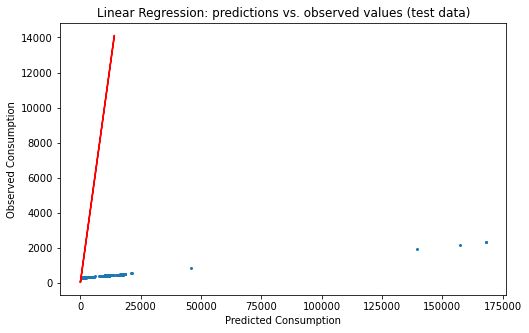

In [118]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled_dj), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Consumption')
ax.set_ylabel('Observed Consumption');

In [119]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train_scaled_dj, y_train_pred)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [120]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred2 = knn.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test_pred))

test_mse2 = mean_squared_error(y_pred2, y_test_pred)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  -0.6892289910036098
Test RMSE: 6181.55


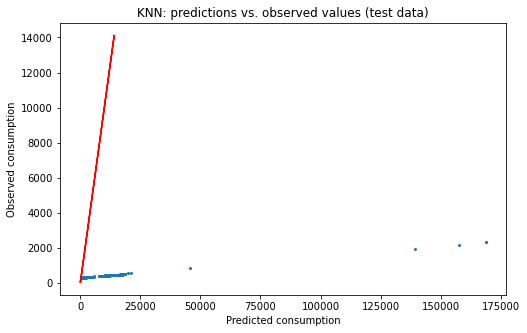

In [121]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled_dj), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted consumption')
ax.set_ylabel('Observed consumption');

In [122]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor(max_depth=3)
# 3. Use the trainning data to train the estimator
dtree.fit(X_train_scaled_dj, y_train_pred)

DecisionTreeRegressor(max_depth=3)

In [123]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test_pred))

test_mse3 = mean_squared_error(y_pred3, y_test_pred)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -0.6924718900578719
Test RMSE: 6175.51


In [124]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled_dj, y_train_pred)

RandomForestRegressor(max_depth=3)

In [125]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test_pred))

test_mse4 = mean_squared_error(y_pred4, y_test_pred)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -0.6928524959783908
Test RMSE: 6174.29


In [126]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled_dj, y_train_pred, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [128]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred5 = xgb_model.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred5, y_test_pred))

test_mse5 = mean_squared_error(y_pred5, y_test_pred)

test_rmse5 = np.sqrt(test_mse5)

print('Test RMSE: %.2f' % test_rmse5)

Test r2 score:  -0.6894851104762998
Test RMSE: 6180.88
